In [1]:
from typing import Literal

from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

from SimAgent.tools import download_structure, fold_sequence, simulate_structure, python_repl, tavily_tool

/nfs/lambda_stor_01/homes/heng.ma/mamba/envs/md_agent/lib/python3.9/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'

In [3]:
tools = [download_structure, fold_sequence, simulate_structure, tavily_tool, python_repl]
tool_node = ToolNode(tools)

In [4]:
model_with_tools = ChatOpenAI(model="gpt-4o-mini", temperature=0).bind_tools(tools)

In [5]:
from typing import Literal

from langgraph.graph import StateGraph, MessagesState, START, END

def should_continue(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END


def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}


workflow = StateGraph(MessagesState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", should_continue, ["tools", END])
workflow.add_edge("tools", "agent")

app = workflow.compile()

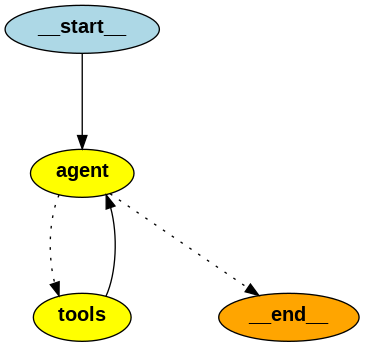

In [6]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_png()))


In [ ]:
# example with a single tool call
for chunk in app.stream(
    {
        "messages": [
            (
                "human",
                "Can you download the pdb structure of 2KKJ from PDB bank to the local dir, and run molecular dynamics simulation of it in 313 K? ",
            )
        ]
    },
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Can you download the pdb structure of 2KKJ from PDB bank to the local dir, and run molecular dynamics simulation of it in 313 K? 


2024-10-24 13:27:11,454 HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================== Ai Message ==================================
Tool Calls:
  download_structure (call_AwkPYUTxuilgOLQIrCPiGgLa)
 Call ID: call_AwkPYUTxuilgOLQIrCPiGgLa
  Args:
    pdb_code: 2KKJ
================================= Tool Message =================================
Name: download_structure

Successfully retrieved 2KKJ.pdb.


2024-10-24 13:27:12,289 HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


================================== Ai Message ==================================
Tool Calls:
  simulate_structure (call_r1H3pckkAt7tuM9ZysKHIGPF)
 Call ID: call_r1H3pckkAt7tuM9ZysKHIGPF
  Args:
    pdb_file: 2KKJ.pdb
    temperature: 313
================================= Tool Message =================================
Name: simulate_structure

Error: 1 validation error for simulate_structure
nonbondedCutoff
  Field required [type=missing, input_value={'pdb_file': '2KKJ.pdb', 'temperature': 313}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
 Please fix your mistakes.


2024-10-24 13:27:13,097 HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
/nfs/lambda_stor_01/homes/heng.ma/mamba/envs/md_agent/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:753: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/nfs/lambda_stor_01/homes/heng.ma/mamba/envs/md_agent/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


================================== Ai Message ==================================
Tool Calls:
  simulate_structure (call_UmEReIR7bzWdkahg8V7RlZS6)
 Call ID: call_UmEReIR7bzWdkahg8V7RlZS6
  Args:
    pdb_file: 2KKJ.pdb
    nonbondedCutoff: 1.0
    temperature: 313


/nfs/lambda_stor_01/homes/heng.ma/mamba/envs/md_agent/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
2024-10-24 13:27:13,493 Topology found, skipping building _2KKJ.pdb...
2024-10-24 13:27:32,014 Adding bonds...
2024-10-24 13:27:33,159 Adding angles...
2024-10-24 13:27:33,175 Adding dihedrals...
2024-10-24 13:27:33,215 Adding Ryckaert-Bellemans torsions...
2024-10-24 13:27:33,217 Adding Urey-Bradleys...
2024-10-24 13:27:33,219 Adding improper torsions...
2024-10-24 13:27:33,223 Adding CMAP torsions...
2024-10-24 13:27:33,226 Adding trigonal angle terms...
2024-10-24 13:27:33,228 Adding out-of-plane bends...
2024-10-24 13:27:33,230 Adding pi-torsions...
2024-10-24 13:27:33,231 Adding stretch-bends...
2024-10-24 13:27:33,233 Adding torsion-torsions...
2024-10-24 13:27:33,235 Adding Nonbonded force...
